In [1]:
import pandas as pd
from pyarrow import csv
import numpy as np
import networkx as nx
from functools import reduce
#import sweetviz as sv
import matplotlib.pyplot as plt

import timeit
import time

In [2]:
trainData_file=csv.read_csv('Data/trainData_final_nolinks_50k_day02.csv')
training_df2 =  trainData_file.to_pandas()
training_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp002915,0.001429,0.012001,2.017466,220248,5555.800000,Missing,8,2888,3.0,2972.0,1.0,991.333333,288.0,96.0,160.000000,0.0,0.0,0.0
1,ActiveDirectory,Comp003448,0.001048,0.002411,1.264516,167808,5552.600000,Missing,4,2888,7.0,2971.0,0.0,717.000000,288.0,96.0,137.142857,0.0,0.0,0.0
2,ActiveDirectory,Comp005774,0.001144,0.002185,1.368704,167808,5553.400000,Missing,3,2888,1.0,1202.0,1202.0,1202.000000,138.0,138.0,138.000000,0.0,0.0,0.0
3,ActiveDirectory,Comp006160,0.002000,0.142927,3.233054,367080,5560.600000,Missing,8,2888,2.0,1.0,0.0,0.500000,618.0,96.0,357.000000,0.0,0.0,0.0
4,ActiveDirectory,Comp007324,0.001334,0.004589,1.644425,230736,5555.000000,Missing,1,2888,4.0,3455.0,1.0,1402.000000,384.0,96.0,264.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546394,Comp378365,Comp485524,0.166667,0.000380,0.333844,110,2774.300000,NoLink,0,11,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
546395,Comp928022,Comp270144,0.236842,0.001057,0.992423,462,2779.100000,NoLink,4,33,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
546396,Comp940027,Comp814131,0.000000,0.000000,0.000000,0,0.000000,NoLink,0,32,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
546397,Comp203056,Comp644901,0.000000,0.000000,0.000000,36,1847.933333,NoLink,2,18,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
testData_file=csv.read_csv('Data/testData_final_nolinks__50k_day02.csv')
testing_df2 =  testData_file.to_pandas()
testing_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp000566,0.001477,0.258959,3.130220,227325,5683.800000,Missing,6,3602,1.0,86.0,86.0,86.000000,0.0,0.0,0.0,2327.0,2327.0,2327.0
1,ActiveDirectory,Comp002524,0.002213,0.008351,2.922840,465475,5690.200000,Missing,10,3602,6.0,4096.0,1.0,1400.666667,480.0,96.0,240.0,0.0,0.0,0.0
2,ActiveDirectory,Comp002907,0.001293,0.009648,1.742483,184025,5682.200000,Missing,2,3602,7.0,2070.0,1.0,296.571429,138.0,96.0,102.0,0.0,0.0,0.0
3,ActiveDirectory,Comp003489,0.001567,0.009273,2.117700,465475,5684.600000,Missing,6,3602,6.0,1.0,0.0,0.333333,96.0,96.0,96.0,0.0,0.0,0.0
4,ActiveDirectory,Comp005115,0.002030,0.007595,2.633240,368050,5688.600000,Missing,1,3602,1.0,0.0,0.0,0.000000,46.0,46.0,46.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554445,Comp235897,Comp505193,0.000000,0.000000,0.000000,154,1890.333333,NoLink,11,14,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
554446,Comp804839,Comp363110,0.285714,0.001697,1.346786,680,2845.100000,NoLink,3,20,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
554447,Comp079329,Comp257079,0.200000,0.000792,0.140047,9,2836.300000,NoLink,1,2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
554448,Comp838114,Comp937614,0.000000,0.000000,0.000000,0,0.000000,NoLink,0,10,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_test, y_test = testing_df2[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment',  'CommonNeighborCentrality','in_degree','out_degree']], testing_df2['Label']


In [5]:
len(training_df2[training_df2["Label"]=="Continuing"])


270005

In [6]:
len(training_df2[training_df2["Label"]=="Missing"])


95542

In [7]:
len(training_df2[training_df2["Label"]=="New"])

130870

In [8]:
len(training_df2[training_df2["Label"]=="NoLink"])

49982

In [9]:
len(testing_df2[testing_df2["Label"]=="Continuing"])

298500

In [10]:
len(testing_df2[testing_df2["Label"]=="Missing"])

102375

In [11]:
len(testing_df2[testing_df2["Label"]=="New"])

103600

In [12]:
TrainTest=[]
TrainTest.append(training_df2)
TrainTest.append(testing_df2)

In [13]:
trainData=training_df2.copy()

In [14]:
train_Cont_df=trainData[trainData["Label"]=="Continuing"]
train_Miss_df=trainData[trainData["Label"]=="Missing"]
train_New_df=trainData[trainData["Label"]=="New"]
train_NoLink_df=trainData[trainData["Label"]=="NoLink"]

In [15]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLink']
#report_2 = classification_report(y_test, pred, target_names=target_names)
#print(f"Test Score\t {pred}")
#print(report_2)

In [16]:
dfc=train_Cont_df.sample(n = 49000)
dfm=train_Miss_df.sample(n = 49000)
dfn=train_New_df.sample(n = 49000)
dfnl=train_NoLink_df.sample(n = 49000)

In [17]:
trainData_df3=pd.concat([dfc,dfm,dfn,dfnl],ignore_index=True)
X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','in_degree','out_degree']], trainData_df3['Label']


In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


clf = AdaBoostClassifier(n_estimators=100, random_state=0)
#model.fit(X_train, y_train)

#print(f"Accuracy on the test set: {accuracy_score(y_test, model.predict(X_test))}")

In [19]:
clf.fit(X_train_3, y_train_3)
pred_adaboost = clf.predict(X_test)
Adaboost_Accuracy_score=accuracy_score(y_test, pred_adaboost)

print(f"Accuracy on the test set: {Adaboost_Accuracy_score}")

Accuracy on the test set: 0.6538245107764451


In [20]:
# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix
#print("Sample size for Computer Work   =",(X['Activity']==2).sum())

pred_adaboost = clf.predict(X_test)
cm_adaboost = confusion_matrix(y_test, pred_adaboost)

print('Confusion Matrix: \n', cm_adaboost)

Confusion Matrix: 
 [[232988  62818   2691      3]
 [ 78799  21497   2074      5]
 [  2154   3811  80020  17615]
 [     1      8  21958  28008]]


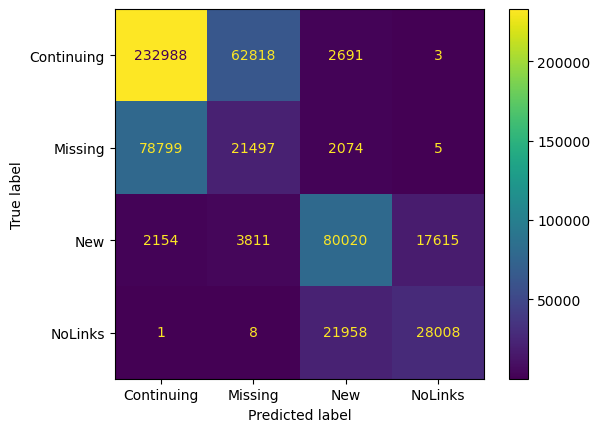

In [21]:
#step 5 Performance Evaluation: Confusion Matrix Visualization
import matplotlib.pyplot as plt

class_names=['Continuing','Missing','New','NoLinks']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost, display_labels=class_names)
disp.plot(values_format="d")
#disp.plot()
plt.show()

In [22]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
report_2 = classification_report(y_test, pred_adaboost, target_names=target_names)
#print(f"Test Score\t {pred}")
print(report_2)

              precision    recall  f1-score   support

  Continuing       0.74      0.78      0.76    298500
     Missing       0.24      0.21      0.23    102375
         New       0.75      0.77      0.76    103600
     NoLinks       0.61      0.56      0.59     49975

    accuracy                           0.65    554450
   macro avg       0.59      0.58      0.58    554450
weighted avg       0.64      0.65      0.65    554450



In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_3, y_train_3)
pred_gnb = gnb.predict(X_test)

gnb_Accuracy_score=accuracy_score(y_test, pred_gnb)

print(f"Accuracy on the test set with Guassian Naive Baye: {gnb_Accuracy_score}")


Accuracy on the test set with Guassian Naive Baye: 0.6951573631526738


In [24]:
# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix


pred_gnb = gnb.predict(X_test)
cm_gnb = confusion_matrix(y_test, pred_gnb)

print('Confusion Matrix: \n', cm_gnb)

Confusion Matrix: 
 [[264693  10413     13  23381]
 [ 89888   1243      0  11244]
 [  7209   1004  69817  25570]
 [     8      0    290  49677]]


In [25]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
report_2 = classification_report(y_test, pred_gnb, target_names=target_names)
#print(f"Test Score\t {pred}")
print(report_2)

              precision    recall  f1-score   support

  Continuing       0.73      0.89      0.80    298500
     Missing       0.10      0.01      0.02    102375
         New       1.00      0.67      0.80    103600
     NoLinks       0.45      0.99      0.62     49975

    accuracy                           0.70    554450
   macro avg       0.57      0.64      0.56    554450
weighted avg       0.64      0.70      0.64    554450



In [26]:
from sklearn.ensemble import GradientBoostingClassifier

XGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
XGB.fit(X_train_3, y_train_3)
pred_XGB = XGB.predict(X_test)

XGB_Accuracy_score=accuracy_score(y_test, pred_XGB)

print(f"Accuracy on the test set with Gradient_Boosting_Classifier : {XGB_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix


pred_XGB = XGB.predict(X_test)
cm_XGB = confusion_matrix(y_test, pred_XGB)

print('Confusion Matrix: \n', cm_XGB)

# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
report_2 = classification_report(y_test, pred_XGB, target_names=target_names)
#print(f"Test Score\t {pred}")
print(report_2)

Accuracy on the test set with Gradient_Boosting_Classifier : 0.42859410226350436
Confusion Matrix: 
 [[  1696 296786     18      0]
 [   296 102059     20      0]
 [   102   9066  87317   7115]
 [     0     19   3394  46562]]
              precision    recall  f1-score   support

  Continuing       0.81      0.01      0.01    298500
     Missing       0.25      1.00      0.40    102375
         New       0.96      0.84      0.90    103600
     NoLinks       0.87      0.93      0.90     49975

    accuracy                           0.43    554450
   macro avg       0.72      0.69      0.55    554450
weighted avg       0.74      0.43      0.33    554450



In [27]:
#import svm model
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

LinearSVC  = make_pipeline(StandardScaler(),LinearSVC(dual=False, random_state=0, tol=1e-5))
LinearSVC.fit(X_train_3, y_train_3)
pred_LinearSVC = LinearSVC.predict(X_test)

LinearSVC_Accuracy_score=accuracy_score(y_test, pred_LinearSVC)

print(f"Accuracy on the test set with LinearSVC : {LinearSVC_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix


pred_LinearSVC= LinearSVC.predict(X_test)
cm_LinearSVC = confusion_matrix(y_test, pred_LinearSVC)

print('Confusion Matrix: \n', cm_LinearSVC)

# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
report_2 = classification_report(y_test, pred_LinearSVC, target_names=target_names)
#print(f"Test Score\t {pred}")
print(report_2)

Accuracy on the test set with LinearSVC : 0.6217061953287041
Confusion Matrix: 
 [[143458 154943     99      0]
 [ 22707  79664      4      0]
 [    71   9048  71957  22524]
 [     0     19    330  49626]]
              precision    recall  f1-score   support

  Continuing       0.86      0.48      0.62    298500
     Missing       0.33      0.78      0.46    102375
         New       0.99      0.69      0.82    103600
     NoLinks       0.69      0.99      0.81     49975

    accuracy                           0.62    554450
   macro avg       0.72      0.74      0.68    554450
weighted avg       0.77      0.62      0.64    554450



In [28]:
#import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train_3, y_train_3)
pred_LogReg = LogReg.predict(X_test)

LogReg_Accuracy_score=accuracy_score(y_test, pred_LogReg)

print(f"Accuracy on the test set with LogReg : {LogReg_Accuracy_score}")

# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix


pred_LogReg= LogReg.predict(X_test)
cm_LogReg = confusion_matrix(y_test, pred_LogReg)

print('Confusion Matrix: \n', cm_LogReg)

# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
report_2 = classification_report(y_test, pred_LogReg, target_names=target_names)
#print(f"Test Score\t {pred}")
print(report_2)

/home/asha/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on the test set with LogReg : 0.49315537920461716
Confusion Matrix: 
 [[147992 124271      0  26237]
 [ 24428  67013      0  10934]
 [ 34361  43560  13764  11915]
 [    20   1627   3667  44661]]
              precision    recall  f1-score   support

  Continuing       0.72      0.50      0.59    298500
     Missing       0.28      0.65      0.40    102375
         New       0.79      0.13      0.23    103600
     NoLinks       0.48      0.89      0.62     49975

    accuracy                           0.49    554450
   macro avg       0.57      0.54      0.46    554450
weighted avg       0.63      0.49      0.49    554450

